# Email Spam Detection:

- The goal of this project is to develop a robust email spam detection system using machine learning techniques. By analyzing the content and characteristics of emails, the system should be able to accurately classify incoming emails as either spam or legitimate (ham).

## Importing dependencies:

In [1]:
import os, warnings
import numpy as np, pandas as pd
import seaborn as sns, matplotlib.pyplot as plt

In [2]:
warnings.filterwarnings('ignore')
%matplotlib inline

## Loading Dataset:

- Kaggle datasets: https://www.kaggle.com/datasets/venky73/spam-mails-dataset/data

In [3]:
data = pd.read_csv(os.path.join('Dataset', 'spam_ham_dataset.csv'))
data[:10]

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
5,2949,ham,Subject: ehronline web address change\r\nthis ...,0
6,2793,ham,Subject: spring savings certificate - take 30 ...,0
7,4185,spam,Subject: looking for medication ? we ` re the ...,1
8,2641,ham,Subject: noms / actual flow for 2 / 26\r\nwe a...,0
9,1870,ham,"Subject: nominations for oct . 21 - 23 , 2000\...",0


---

## Analysing Data:

In [4]:
data.groupby('label').describe()

Unnamed: 0                                                         \
           count    mean          std     min      25%     50%      75%   
label                                                                     
ham       3672.0  1835.5  1060.159422     0.0   917.75  1835.5  2753.25   
spam      1499.0  4421.0   432.868340  3672.0  4046.50  4421.0  4795.50   

              label_num                                     
          max     count mean  std  min  25%  50%  75%  max  
label                                                       
ham    3671.0    3672.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
spam   5170.0    1499.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [6]:
temp_txt = data['text'][3]
print(temp_txt)

Subject: photoshop , windows , office . cheap . main trending
abasements darer prudently fortuitous undergone
lighthearted charm orinoco taster
railroad affluent pornographic cuvier
irvin parkhouse blameworthy chlorophyll
robed diagrammatic fogarty clears bayda
inconveniencing managing represented smartness hashish
academies shareholders unload badness
danielson pure caffein
spaniard chargeable levin



<Axes: xlabel='label', ylabel='count'>

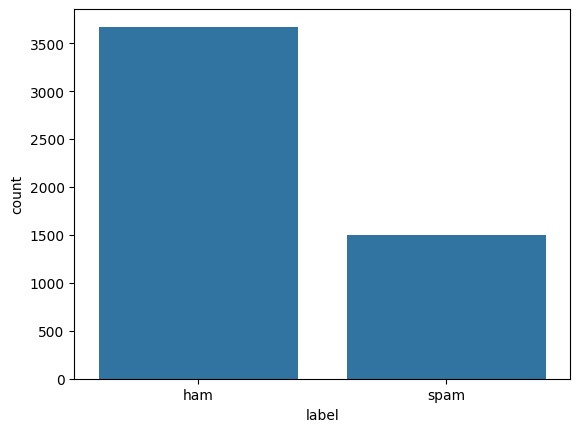

In [7]:
sns.countplot(x='label', data=data)

---

## Data Preprocessing:

- Natural Language Processing using **nltk** library.

In [8]:
import nltk, re, ssl
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [9]:
# nltk.download('all')

In [10]:
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S+|[^A-Za-z0-9]:\S+|subject:\S+|nbsp"

In [11]:
def txt_preprocess(text):
    text = re.sub(text_cleaning_re, ' ',  str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stemmer.stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [12]:
txt_preprocess(temp_txt)

'subject: photoshop , window , offic . cheap . main trend abas darer prudent fortuit undergon lightheart charm orinoco taster railroad affluent pornograph cuvier irvin parkhous blameworthi chlorophyl robe diagrammat fogarti clear bayda inconvenienc manag repres smart hashish academi sharehold unload bad danielson pure caffein spaniard chargeabl levin'

In [13]:
data['preprocessed_txt'] = data.text.apply(lambda x: txt_preprocess(x))

In [14]:
data[:10]

,Unnamed: 0,label,text,label_num,preprocessed_txt
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,subject: enron methanol ; meter # : 988291 fol...
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,"subject: hpl nom januari 9 , 2001 ( see attach..."
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,"subject: neon retreat ho ho ho , ' around wond..."
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,"subject: photoshop , window , offic . cheap . ..."
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,subject: : indian spring deal book teco pvr re...
5,2949,ham,Subject: ehronline web address change\r\nthis ...,0,subject: ehronlin web address chang messag int...
6,2793,ham,Subject: spring savings certificate - take 30 ...,0,subject: spring save certif - take 30 % save 3...
7,4185,spam,Subject: looking for medication ? we ` re the ...,1,subject: look medic ? ` best sourc . difficult...
8,2641,ham,Subject: noms / actual flow for 2 / 26\r\nwe a...,0,subject: nom / actual flow 2 / 26 agre - - - -...
9,1870,ham,"Subject: nominations for oct . 21 - 23 , 2000\...",0,"subject: nomin oct . 21 - 23 , 2000 ( see atta..."


### Vectorizing:

In [15]:
from sklearn.feature_extraction.text import CountVectorizer


In [16]:
vector = CountVectorizer(max_features=5000)
X = vector.fit_transform(data['preprocessed_txt']).toarray()
y = data['label']

In [17]:
X

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [18]:
y[:2]

0    ham
1    ham
Name: label, dtype: object

---

## Splitting data into train and test sets:

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

## Logistic Regression:

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss

In [21]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [22]:
y_pred = model.predict(X_test)
y_pred

array(['ham', 'spam', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object)

## Accuracy:

In [23]:
accu = accuracy_score(y_test, y_pred)
accu_p = round(accu*100,2)
print(f"Accuracy Score: {accu_p}%")

Accuracy Score: 97.2%


## Confusion Matrix:

In [24]:
from sklearn.metrics import confusion_matrix

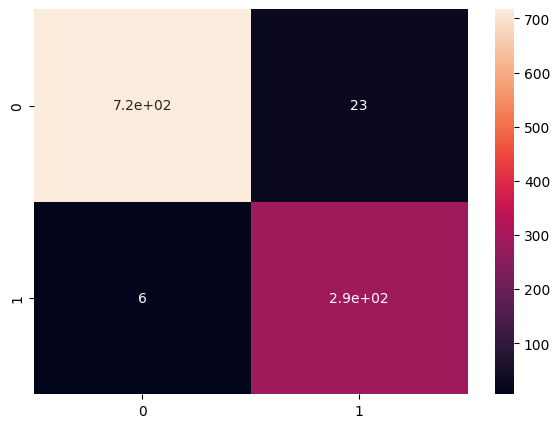

In [25]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.show()

## Classification report:

In [26]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         ham       0.99      0.97      0.98       740
        spam       0.93      0.98      0.95       295

    accuracy                           0.97      1035
   macro avg       0.96      0.97      0.97      1035
weighted avg       0.97      0.97      0.97      1035



---